In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor


In [46]:
def clean_and_analyze_data(df, dataset_name):
    print(f"\n========== {dataset_name} DATASET ==========")

    print("Initial Shape:", df.shape)

    print("\nNull values before cleaning:")
    print(df.isnull().sum())

    df = df.dropna()
    print("\nShape after removing null values:", df.shape)

    dup_rows = df.duplicated().sum()
    print("\nDuplicate rows found:", dup_rows)

    df = df.drop_duplicates()
    print("Shape after removing duplicate rows:", df.shape)

    dup_cols = df.columns[df.columns.duplicated()]
    print("\nDuplicate columns:", list(dup_cols))

    df = df.loc[:, ~df.columns.duplicated()]

    print("\nFinal Dataset Info:")
    print(df.info())

    return df

In [47]:
day_df = pd.read_csv("day.csv")
day_df = clean_and_analyze_data(day_df, "DAY")


========== DAY DATASET ==========
Initial Shape: (731, 16)

Null values before cleaning:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Shape after removing null values: (731, 16)

Duplicate rows found: 0
Shape after removing duplicate rows: (731, 16)

Duplicate columns: []

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   w

In [48]:
X = day_df.drop(columns=['instant', 'casual', 'registered', 'yr', 'dteday'])
y = day_df['cnt']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [117]:
model = XGBRegressor(
    n_estimators=25,    # lots of trees
    learning_rate=0.05,   # small learning rate to fit training well
    max_depth=20,         # very deep trees
    random_state=42,
    objective='reg:squarederror',
    reg_alpha=0,          # no L1 regularization
    reg_lambda=0          # no L2 regularization
)

# Fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=25,
             n_jobs=None, num_parallel_tree=None, ...)

In [118]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

In [119]:
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

In [120]:
print("\nDAY DATASET - XGBOOST PERFORMANCE")
print(f"Training R² Score : {train_r2:.4f}")
print(f"Training RMSE     : {train_rmse:.2f}")
print(f"Test R² Score     : {test_r2:.4f}")
print(f"Test RMSE         : {test_rmse:.2f}")
print(f"Test MAE          : {test_mae:.2f}")


DAY DATASET - XGBOOST PERFORMANCE
Training R² Score : 0.9231
Training RMSE     : 531.09
Test R² Score     : 0.9182
Test RMSE         : 572.60
Test MAE          : 479.32


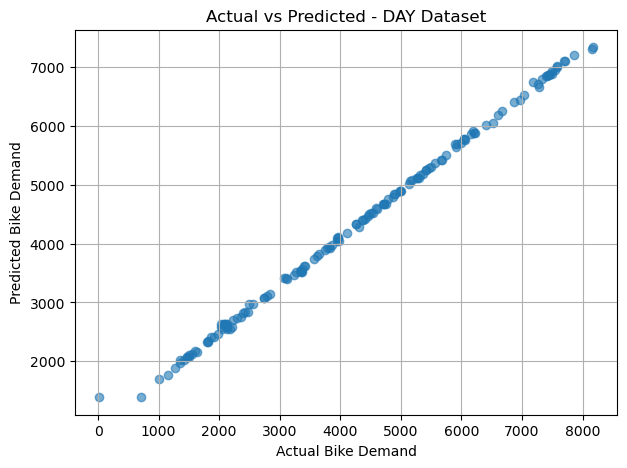

In [115]:
import matplotlib.pyplot as plt

# -------- ACTUAL vs PREDICTED PLOT --------
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual Bike Demand")
plt.ylabel("Predicted Bike Demand")
plt.title("Actual vs Predicted - DAY Dataset")
plt.grid(True)
plt.show()

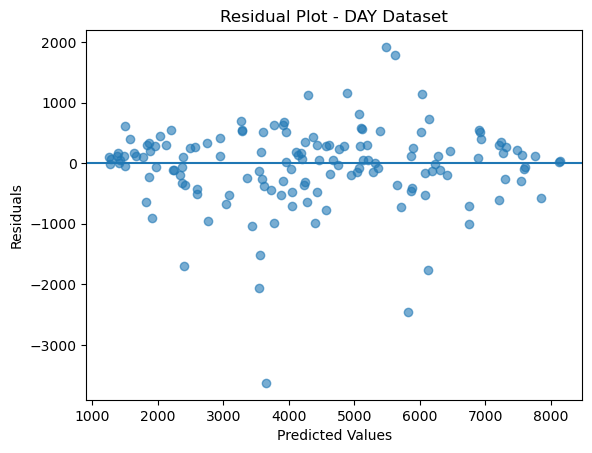

In [116]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - DAY Dataset")
plt.show()